# Α Fuel Consumption Analysis 

In this project, our goal is to analyze, clean(if it's necessary ), prepare our data and finally predict the fuel consumption from a list of cars. The data set that we are going to use for our purpose is taken from UCI Machine Learning Repository and you can find it in the link below: https://archive.ics.uci.edu/ml/datasets/auto+mpg


In honor of the author, I should make a reference to the following information: "This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition." July 1993.


So, all we have to do is to...

### dive into the data

This data set is a slightly modified version of the dataset provided in the StatLib library. Eight (8) of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file https://tinyurl.com/ldhylg6

Let's take a stroll in the attributes

Number of Attributes: 8 including the target attribute (mpg). I dropped the "car name" column because It doesn't affect my analysis and furthermore my predicting model.

Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete


In [1]:
#load data (csv file)
import pandas as pd
data=pd.read_csv('auto-mpg-nameless.csv')
print(data.head(3))

    mpg  cyls  displacement     hp  weight   acc  year  origin
0  18.0     8         307.0  130.0  3504.0  12.0    70       1
1  15.0     8         350.0  165.0  3693.0  11.5    70       1
2  18.0     8         318.0  150.0  3436.0  11.0    70       1


If the technical characteristics of the car manufacturing are an unknown field for you, [this](http://www.vroomgirls.com/what-the-numbers-mean/) article may be useful  ;-).
 
There is something important that must be taken into account! Our data set has been composed for cars that were constructed in 70's and early 80's. Since then, the car industry has changed a lot. The standards are different these days. Don't worry, I will make this difference clear later in my data analysis.



### Data Exploration
This is a regression problem. That means the target value must be numerical. We have to define if our problem is linear or not. Thus, if the dependent variable is y(target attribute) and the independent is x(features) the relationship between x and y must be y(x) = βx + α + ε. The coefficient 'ε' is the error that is included in our prediction. All we have to do is to minimize the error as much as possible.

Let's see if our features x, affect the target value y. The target value is 'mpg' which stands for 'miles per gallon'. So how [correlated](https://en.wikipedia.org/wiki/Correlation_and_dependence) are the rest attributes with the predictable one? 

In [2]:
#Correlation matrix
corr_matrix=data.corr().sort_values(ascending=False,by='mpg')
corr_matrix

,mpg,cyls,displacement,hp,weight,acc,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000
acc,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
cyls,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
hp,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005


Cool, but maybe some visuals are more useful to see the correlation in attributes.

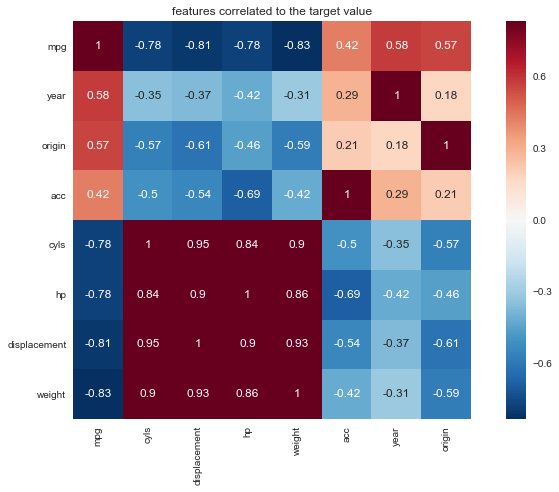

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr_matrix,annot=True,vmax=0.8,square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('features correlated to the target value')
plt.tight_layout()
plt.show()

Correlation is any of a broad class of statistical relationships involving dependence, though in common usage it most often refers to the extent to which two variables have a linear relationship with each other. The correlation is +1 in the case of a perfect direct (increasing) linear relationship , −1 in the case of a perfect decreasing (inverse) linear relationship, and some value in the open interval (−1, 1) in all other cases, indicating the degree of linear dependence between the variables. As it approaches zero there is less of a relationship (closer to uncorrelated). The closer the coefficient is to either −1 or 1, the stronger the correlation between the variables.

#### Visuals make it clear...
Well, as we can see the most correlated variables are weight, displacement, hp and cyls in descending order(in absolute terms). The correlation is negative (Take a look at this really fancy interactive visualization http://rpsychologist.com/d3/correlation/). This means that as the one variable increases, the other decreases. We get a better view of this if we look at the scatter plot of the most correlated value...weight!

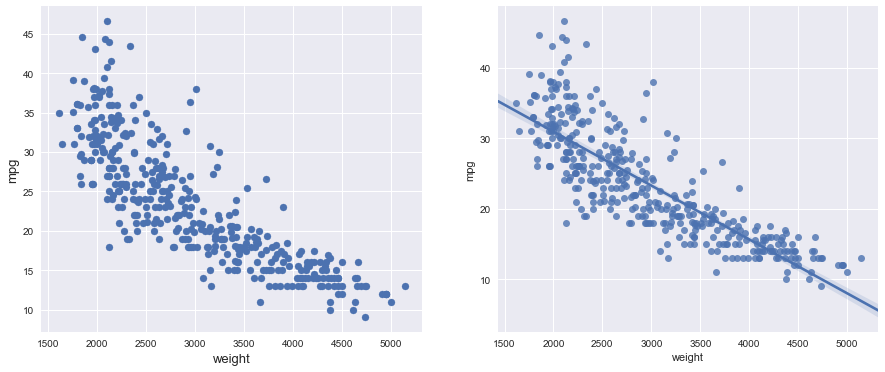

In [4]:
f, ax = plt.subplots(figsize=(15, 6))
plt.subplot(1,2,1)
plt.scatter(data.weight,data.mpg)
plt.xlabel('weight',fontsize=13)
plt.ylabel('mpg',fontsize=13)
plt.subplot(1,2,2)
sns.regplot(data.weight,data.mpg)
plt.show()

This seems to explain the relationship between 'mpg' and 'weight'. The heavier the car the more fuel consumption we have as we can drive a few miles per gallon. Kinda weird especially in 2017 but keep that in mind... our data set is 24 years old. All plots with numerical-continuous variables are shown below. Examine every feature comparatively to 'mpg'!

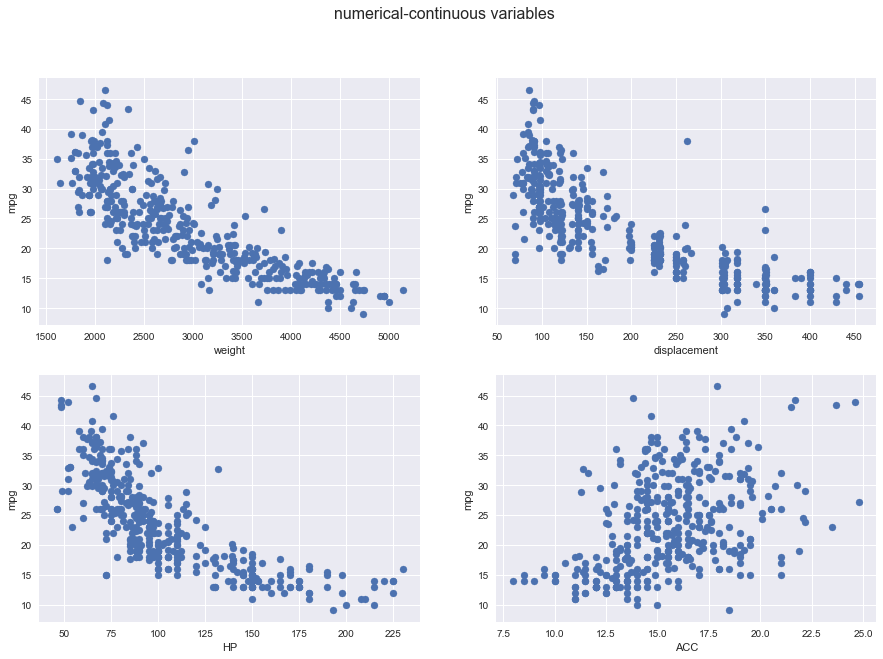

In [5]:
# plots in descending order of correlation
from pylab import *

f, ax = plt.subplots(figsize=(15, 10))
plt.suptitle('numerical-continuous variables',fontsize=16)

plt.subplot(2,2,1)
plt.scatter(data.weight,data.mpg)
plt.xlabel('weight')
plt.ylabel('mpg')

plt.subplot(2,2,2)
plt.scatter(data.displacement,data.mpg);
plt.xlabel('displacement')
plt.ylabel('mpg')

plt.subplot(2,2,3)
plt.scatter(data.hp,data.mpg);
plt.xlabel('HP')
plt.ylabel('mpg')

plt.subplot(2,2,4)
plt.scatter(data.acc,data.mpg)
plt.xlabel('ACC')
plt.ylabel('mpg')
plt.tight_layout
plt.show()

What we see here is while weight, displacement, and horsepower are increasing the mpg value is decreasing. This explains the negative values in the correlation matrix. The 'ACC-mpg' plot is different from the other three. Although the attribute is numerical, its correlation value is +0.42. We can consider that there is not a strong linear relationship.


### What's goin' on with discrete numerical attributes


We got 2 positive correlated values for 2 multi-valued discrete atrributes. Year and origin. Let's start with model-year. Like I said the data comes from the 70's and there are not similarities with the present. However, let's see how the 'mpg' changes over the years. Moreover, we'll see how the origin of the engine affects the 'mpg' too.

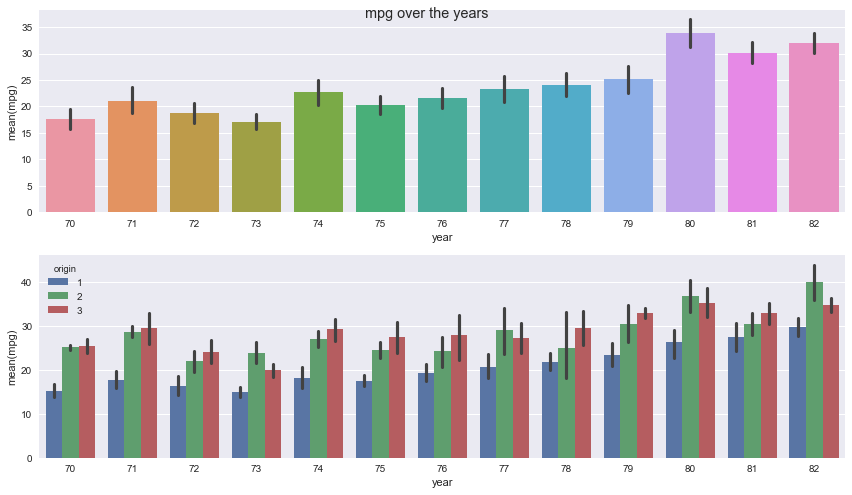

In [6]:
f, ax = plt.subplots(figsize=(12, 7))
plt.suptitle('mpg over the years')
plt.subplot(2,1,1)
sns.barplot(data.year, data.mpg)
plt.subplot(2,1,2)
sns.barplot(data.year,data.mpg,hue=data.origin)
plt.tight_layout()
plt.show()


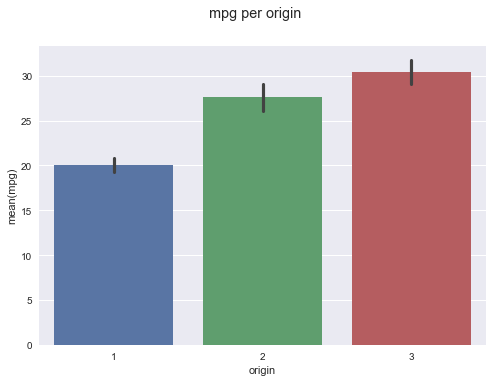

,mpg,cyls,displacement,hp,weight,acc
origin,,,,,,
1,20.033469,6.277551,247.512245,119.048980,3372.489796,14.990204
2,27.602941,4.161765,109.632353,80.558824,2433.470588,16.794118
3,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152


In [7]:
# 1.US , 2.European , 3. Japanese
plt.suptitle('mpg per origin')
sns.barplot(x='origin',y='mpg',data=data)
plt.show()

# Group the 'mpg' and other features by origin
grouped_mean=data.groupby(['origin']).mean()
grouped_mean.drop(grouped_mean.columns[6],axis=1,inplace=True)
grouped_mean

Well, let's say few words about the last plots and the 'group by origin' table. First of all, japanese cars seem to become more economic. The driver can go through more miles per gallon. Origin is not necessary a criterion. The average fuel consumption decreases over the years as the mean of 'mpg' attribute is getting bigger. Good news for the customers, good news for the car industry.

The second plot has something to say about the origin. Japanese cars are more economic than EU and US cars on average. 'Grouped_mean' table can prove this. If you are a US car driver you have to pay more money for gasoline (sic). Why that? US cars (many of them also known as muscle cars) have more cylinders, the engine has to consume more gasoline (displacement) and the weight is drastically larger than the average. In a final analysis, USA is Petroleum producer country.


#### Convert Displacement from Cubic Inches (cin) to Cubic Centimeters (cc)
Most of the European people are familiar with cubic centimeters (or liters) instead of cubic inches. Let's convert this in S.I. and append it into the data frame.


#1 cubic inch =16.387064 cubic centimeters

In [8]:
data['cc']=np.array(data.displacement)*16.38706
print(data.head(2))

    mpg  cyls  displacement     hp  weight   acc  year  origin          cc
0  18.0     8         307.0  130.0  3504.0  12.0    70       1  5030.82742
1  15.0     8         350.0  165.0  3693.0  11.5    70       1  5735.47100


### preparaion for the model

At the first part of analysis, we evaluated that our attributes have a linear relationship. I am going to do some work with missing values (NA's)(this data set is too small), outliers, distribution plots and explore the normality of them all. Let's start with...


#### mising values

If there are any missing values we have to face them. What technique we will use is dependent on each case. We can remove NA's, we can fill the values with the median or mean of the attribute. However, it's very important the number of missing values comparatively to the number of samples of data set.

In [9]:
# looking for NA's
data.isnull().sum()

mpg             0
cyls            0
displacement    0
hp              0
weight          0
acc             0
year            0
origin          0
cc              0
dtype: int64

Well, thanks to pandas we can really quick search for NA's, but it' not so easy every time. As we see, there are no missing values(#6 missing values removed from the original dataset). Once again, missing values affects a lot the result of our work and our predictions but this time we may be lucky! :)

#### outliers
Outliers are also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information. Most commonly used method to detect outliers is visualization. We use various visualization methods, like Box-plot, Histogram, Scatter Plot. If we go back to 'numerical-continuous variables' plots we can see if there are any outliers. Let's do it again

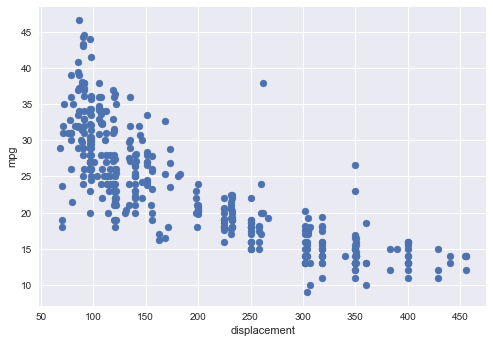

In [10]:
plt.scatter(data.displacement,data.mpg);
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.show()

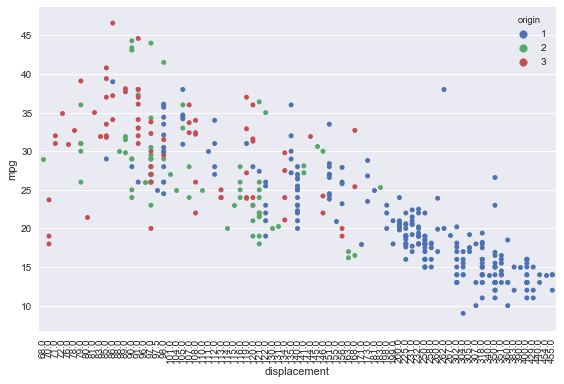

In [11]:
# a stripplot to identify the origin of outlier(?)
sns.stripplot(x='displacement',y='mpg',hue='origin',data=data)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Well there is a suspicion of a 'US' car with displacement value equals to 262 and mpg equals to 38. We can remove it but I suggest to hold this instance in our data set. Why? Maybe it's a special edition car or has a lot of acceleration. We can find its index with this line

In [12]:
print(data.loc[(data['displacement'] > 250) & (data['mpg']>35)])

      mpg  cyls  displacement    hp  weight   acc  year  origin          cc
381  38.0     6         262.0  85.0  3015.0  17.0    82       1  4293.40972


#### Normal distribution or not ? skewness give us the answer ...

According to Hair et al. (2013):

"**Normality** - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity)"... so that's the main reason why we are doing this analysis.

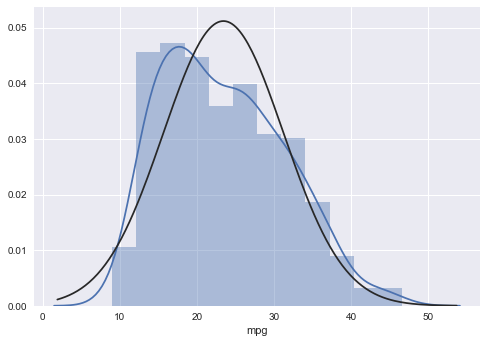

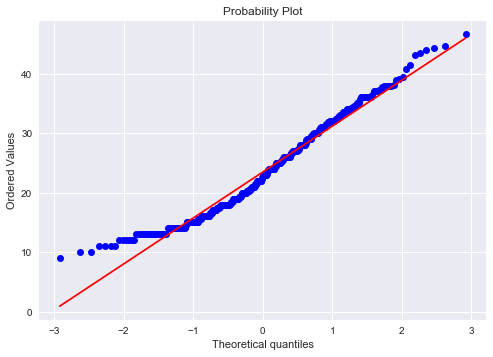

mpg skewness: 0.45709232306


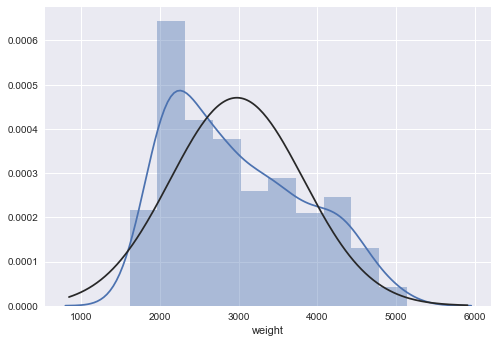

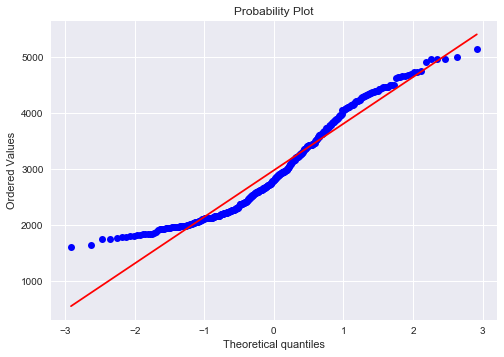

weight skewness: 0.519585674056


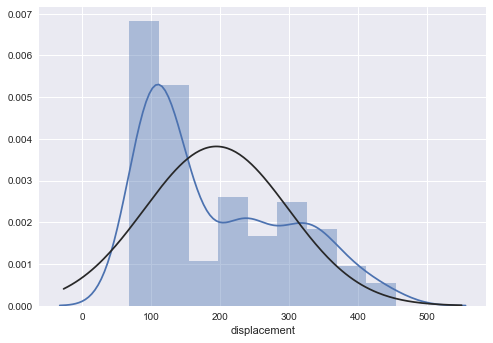

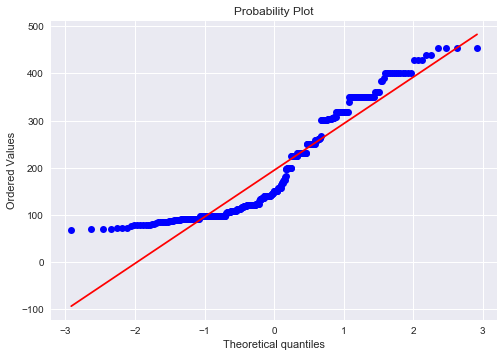

disp skewness: 0.701669099658


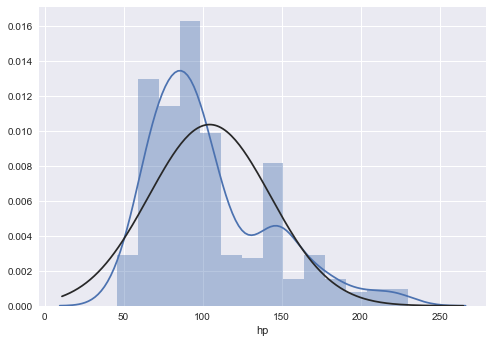

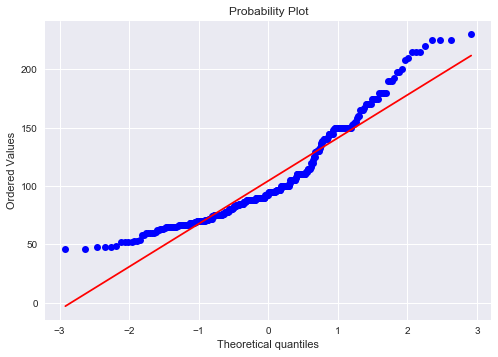

hp skewness: 1.0873262824


In [13]:
from scipy import stats
from scipy.stats import norm

# mpg
sns.distplot(data.mpg,hist=True,fit=norm);
fig=plt.figure()
prob_plot=stats.probplot(data['mpg'],plot=plt)
plt.show()
print('mpg skewness:',data.mpg.skew())

# weight
sns.distplot(data.weight,hist=True,fit=norm);
fig=plt.figure()
prob_plot=stats.probplot(data['weight'],plot=plt)
plt.show()
print('weight skewness:',data.weight.skew())

# displacement
sns.distplot(data.displacement,hist=True,fit=norm);
fig=plt.figure()
prob_plot=stats.probplot(data.displacement,plot=plt)
plt.show()
print('disp skewness:',data.displacement.skew())

# hp
sns.distplot(data.hp,hist=True,fit=norm);
fig=plt.figure()
prob_plot=stats.probplot(data['hp'],plot=plt)
plt.show()
print('hp skewness:',data.hp.skew())




Accordind to [skewness](https://en.wikipedia.org/wiki/Skewness)

*"In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive or negative, or even undefined."* *"[...] **positive skew** indicates that the tail on the right side is longer or fatter than the left side. In cases where one tail is long but the other tail is fat, skewness does not obey a simple rule."*
*"[...] In cases where it is necessary, data might be transformed to have a normal distribution."*


So what we have here is positive skewness for our numerical continuous features:

mpg skewness: 0.45709232306


weight skewness: 0.519585674056


disp skewness: 0.701669099658


hp skewness: 1.0873262824

Next step is log transformation. We will use np.log instead of np.log1p and that's because we don't have zero values! While x tends to zero(0), y tends to infinity (-∞) and this is a problem.

In [14]:
# log transformation

data['mpg']=np.log(data.mpg)
data['log_wg']=np.log(data.weight)
data['log_cc']=np.log(data.cc)
data['log_hp']=np.log(data.hp)
data['log_dp']=np.log(data.displacement)

print(data.head(2))


        mpg  cyls  displacement     hp  weight   acc  year  origin  \
0  2.890372     8         307.0  130.0  3504.0  12.0    70       1   
1  2.708050     8         350.0  165.0  3693.0  11.5    70       1   

           cc    log_wg    log_cc    log_hp    log_dp  
0  5030.82742  8.161660  8.523340  4.867534  5.726848  
1  5735.47100  8.214194  8.654425  5.105945  5.857933  


In [15]:
# Create new features
# 3* Polynomials on the top 5 correlated features

data['weight2']=data['weight']**2
data['weight3']=data['weight']**3
data['weightsq']=np.sqrt(data['weight'])

data['cc2']=data['cc']**2
data['cc3']=data['cc']**3
data['ccsq']=np.sqrt(data['cc'])


data['displacement2']=data['displacement']**2
data['displacement3']=data['displacement']**3
data['displacementsq']=np.sqrt(data['displacement'])

data['displacement2']=data['displacement']**2
data['displacement3']=data['displacement']**3
data['displacementsq']=np.sqrt(data['displacement'])

data['cyls2']=data['cyls']**2
data['cyls3']=data['cyls']**3
data['cylssq']=np.sqrt(data['cyls'])

data['hp2']=data['hp']**2
data['hp3']=data['hp']**3
data['hpsq']=np.sqrt(data['hp'])


### Building our models

I am going to apply 5 Supervised machine learning models: 1. Linear Regression, 2. Random Forest, 3. Ridge , 4.Lasso & 5. Elastic Net.

First of all, we have to split our data to train and test set. We must train our model with different algorithm each time and then we have to see our prediction accuracy with r2_score and root mean square error. So let's get it...

In [19]:
from sklearn import model_selection,cross_validation
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,LassoLars,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

# cross validation

X=data.iloc[:,1:29]
y=data.iloc[:,0]

X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size=0.2,random_state=45)

print('linear regression')
lnr = LinearRegression()
lnr.fit(X_train,y_train)
pred_1 = lnr.predict(X_test)
print(round(r2_score(y_test,pred_1)*100,2),'%')
print(np.sqrt(mean_squared_error(y_test,pred_1)))
print()
print('random forest')
rf=RandomForestRegressor(n_estimators=100, oob_score = True,random_state =45)
rf.fit(X_train,y_train)
pred_2 = rf.predict(X_test)
print(round(r2_score(y_test,pred_2)*100,2),'%')
print(np.sqrt(mean_squared_error(y_test,pred_2)))
print()
print('ridge')
ridge = Ridge(alpha = 1)
rd=ridge.fit(X_train, y_train)
pred_ridge=rd.predict(X_test)
print(round(r2_score(y_test,pred_ridge)*100,2),'%')
print(np.sqrt(mean_squared_error(y_test,pred_ridge)))
print()
print('lasso')
laso=Lasso(alpha = 0.00001)
laso=laso.fit(X_train,y_train)
pred_laso=laso.predict(X_test)
print(round(r2_score(y_test,pred_laso)*100,2),'%')
print(np.sqrt(mean_squared_error(y_test,pred_laso)))
print()
print('Elastic Net')
EN=ElasticNet(alpha=0.00001)
EN=EN.fit(X_train,y_train)
pred_EN=EN.predict(X_test)
print(round(r2_score(y_test,pred_EN)*100,2),'%')
print(np.sqrt(mean_squared_error(y_test,pred_EN)))




linear regression
87.43 %
0.115401428652

random forest
90.38 %
0.100978442334

ridge
90.1 %
0.102423762695

lasso
90.2 %
0.101928849304

Elastic Net
90.19 %
0.101952583257


/Users/stephanosarampatzes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


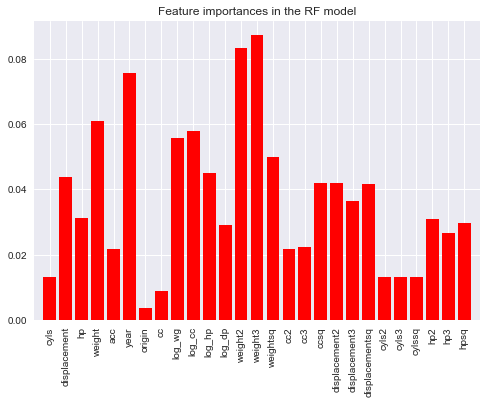

Lasso picked 27 features and eliminated the other 0 features


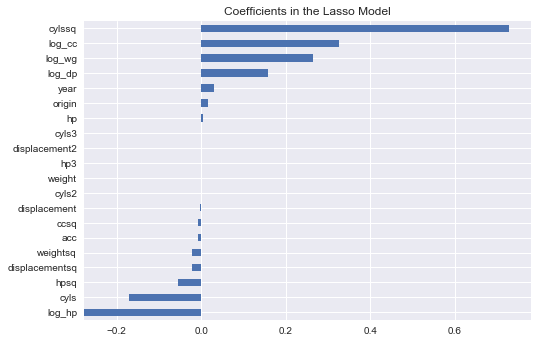

In [17]:
# feature importance plot for ...

# Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances in the RF model")
plt.bar(range(X_train.shape[1]), importances,color="r",align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout
plt.xticks(rotation=90)
plt.show()

# Lasso
coefs = pd.Series(laso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

Well well, not bad! To be honest that's a good score! Random Forest scores almost 90.4% and it's the highest one of 5. Really close are Lasso, Ridge and Elastic Net. Random forest took as priority 'weight2, 'weight3' and 'year'. On the other hand, Lasso picked the square root of cylinders and logged values like 'cc', 'weight' and 'displacement'.

Ridge regression is a more robust version of linear regression, putting constraints on regression coefficients to make them much more natural. Less subject to over-fitting as it performs L2 regularization. Lasso regression is similar to ridge regression, but automatically performs variable reduction with L1 regularization.

Random forest is like bootstrapping algorithm with Decision tree (CART) model. Random forest tries to build multiple CART model with different sample and different initial variables. It will take a random sample of 100 observation and 5 randomly chosen initial variables to build a CART model. We generally see a random forest as a black box which takes in input and gives out predictions, without worrying too much about what calculations are going on the back end. This black box itself have a few levers we can play with. Each of these levers has some effect on the performance of the model. We will get experimental with some of them in another project with more instances!